In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert6/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert6/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert6/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,4
1,1
2,2
3,3
4,2
...,...
1855,3
1856,0
1857,4
1858,4


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,7.780105e-06,0.000040,0.000027,0.000160,5.380579e-05,0.999712,1.936802e-10,7.852173e-13,6.640285e-06,9.867480e-04,3.790536e-05,9.989687e-01
1,7.297665e-05,0.999754,0.000043,0.000120,4.270825e-07,0.000010,3.369219e-01,6.540952e-01,8.945608e-03,6.829579e-07,1.202702e-05,2.453875e-05
2,1.916489e-05,0.000300,0.000004,0.999334,1.249728e-05,0.000331,9.408867e-09,1.651772e-07,6.631060e-13,9.999999e-01,1.610594e-14,1.681032e-10
3,1.874786e-07,0.000104,0.999859,0.000005,2.123697e-06,0.000030,5.629899e-09,1.415552e-07,9.658893e-01,3.073566e-05,6.899030e-04,3.338988e-02
4,6.415075e-07,0.000002,0.000005,0.000050,9.997198e-01,0.000222,7.327420e-14,7.529729e-24,5.906849e-13,3.661182e-09,1.000000e+00,2.174262e-12
...,...,...,...,...,...,...,...,...,...,...,...,...
202,5.623411e-05,0.000234,0.003189,0.002262,5.129320e-04,0.993745,5.615510e-12,7.502888e-03,8.821482e-04,6.088373e-05,4.916212e-09,9.915541e-01
203,1.472854e-07,0.000249,0.999723,0.000006,1.929889e-06,0.000020,1.267675e-06,2.358050e-08,7.175865e-02,1.163456e-03,9.265963e-01,4.802891e-04
204,8.814672e-06,0.000075,0.000053,0.000206,2.076775e-04,0.999449,1.598653e-02,7.122843e-04,1.186622e-01,4.227360e-02,1.446489e-02,8.079005e-01
205,1.981894e-07,0.000106,0.999857,0.000006,4.204789e-06,0.000026,1.025545e-09,1.873669e-13,9.885288e-01,6.332670e-08,1.146533e-02,5.747351e-06


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,5.110107e-07,0.000003,1.590872e-06,0.000024,0.999869,0.000102,8.925185e-05,4.747361e-06,1.530530e-05,2.586961e-06,9.998566e-01,3.145612e-05
1,4.388915e-05,0.999194,1.771843e-04,0.000548,0.000006,0.000030,8.553511e-06,9.999597e-01,5.333033e-06,1.265866e-06,1.760026e-07,2.492217e-05
2,1.616983e-07,0.000217,9.997681e-01,0.000005,0.000001,0.000009,1.331074e-05,9.736670e-05,9.993984e-01,5.722401e-06,3.444346e-06,4.818414e-04
3,6.566693e-05,0.000115,4.973264e-07,0.999346,0.000241,0.000232,2.089144e-04,2.200925e-07,1.405861e-03,9.917848e-01,6.532692e-03,6.748127e-05
4,2.649658e-06,0.003611,9.962283e-01,0.000017,0.000001,0.000140,2.769722e-12,1.544248e-07,9.999999e-01,1.956094e-12,1.328491e-12,6.160358e-10
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2.409035e-05,0.000075,9.488845e-07,0.999642,0.000009,0.000250,3.698262e-17,3.968281e-15,1.344102e-21,9.999188e-01,9.293107e-09,8.117367e-05
1856,9.955193e-01,0.001356,7.494498e-07,0.001737,0.000022,0.001365,9.613765e-01,3.477971e-02,3.071885e-03,5.340534e-04,2.318523e-04,5.979859e-06
1857,2.784763e-07,0.000001,1.670589e-06,0.000019,0.999886,0.000092,5.171353e-09,6.235674e-14,5.430216e-07,1.604926e-04,9.998361e-01,2.810983e-06
1858,1.203074e-05,0.000096,5.784472e-05,0.009850,0.986992,0.002992,2.259942e-07,1.655710e-09,1.896437e-04,1.704427e-03,1.296348e-01,8.684709e-01


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([4, 1, 2, ..., 4, 4, 2]), (1860,))

# training machine learning

In [19]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='rbf')
svm=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [20]:
predictions

array([5, 1, 3, 2, 4, 3, 5, 5, 2, 4, 0, 0, 4, 5, 4, 3, 3, 4, 3, 3, 4, 1,
       4, 5, 0, 4, 4, 2, 3, 4, 5, 3, 1, 3, 5, 3, 5, 5, 0, 5, 0, 4, 3, 2,
       2, 5, 2, 5, 4, 3, 2, 1, 4, 5, 1, 4, 1, 0, 1, 0, 4, 1, 4, 1, 3, 2,
       5, 4, 3, 1, 1, 2, 3, 4, 1, 3, 1, 1, 2, 0, 5, 1, 5, 4, 1, 3, 2, 0,
       5, 5, 2, 3, 2, 5, 5, 1, 3, 3, 5, 2, 0, 4, 4, 2, 1, 3, 1, 4, 3, 5,
       2, 5, 3, 2, 5, 5, 3, 2, 3, 2, 1, 3, 1, 1, 3, 1, 5, 1, 3, 4, 4, 3,
       5, 5, 5, 4, 2, 0, 1, 4, 4, 2, 1, 2, 3, 2, 5, 4, 5, 4, 4, 5, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 3, 5, 4, 4, 4, 2, 1, 0, 2, 2, 2, 3, 2, 4,
       0, 1, 3, 5, 1, 5, 1, 5, 4, 5, 3, 1, 2, 2, 4, 1, 3, 3, 2, 2, 5, 3,
       1, 1, 3, 2, 5, 2, 5, 2, 2])

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.95      0.95      0.95        38
           2       0.95      0.95      0.95        42
           3       1.00      0.93      0.96        41
           4       0.97      0.97      0.97        36
           5       0.95      1.00      0.97        38

    accuracy                           0.96       207
   macro avg       0.96      0.97      0.96       207
weighted avg       0.96      0.96      0.96       207

----accuracy score 96.1352657004831 ----


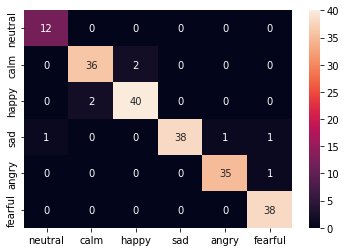

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/fusion_model/SVM/rbf/expert6 '
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
